# ECE 143: Communications Network Individual Project

# Problem Statement and Design

In our analysis of an ad-hoc communications network, there is an open-area field in which cell towers will be placed. We specify the size of the field for potential coverage. Cell towers are placed based on random size and location within the given potential coverage area.

In order to do this, I designed a program that allows the user to input the size of the potential coverage area using two variables: width and height.

The Tower class that I designed for this creates Tower objects which have a starting coordinate, a width, and a height, all three of which are randomly generated. The starting coordinate is the bottom left hand corner of the coverage rectangle that is formed. 

Given the size of the coverage area, a random coordinate as well as width and height are generated to fit within the potential coverage space. 

Below are all functions/libraries that will be imported for use in this analysis.

In [44]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import time
import itertools
from TowerFunctions import *
from Towers import *

This is a helper function for visualization purposes.

In [45]:
def graph_patches(towers):
    """Gets the patches to graph
    """
    colors = itertools.cycle(["antiquewhite", "aqua","yellow", "orange", \
                              "black", "blue", "blueviolet", "brown", "chartreuse", \
                              "cornflowerblue", "coral", "magenta", "mediumpurple", \
                              "midnightblue", "seagreen"])
    num_patches = 0
    coverages = []
    for t in towers:
        if t != None:
            coverage = patches.Rectangle(t.start,t.width,t.height, fc=next(colors))
            coverages.append(coverage)
        else:
            coverages.append(None)
        num_patches += 1
    return coverages

The width and height for the desired coverage area can be specified below. We will set them to 20, 20 for the purposes of this demonstration.

In [46]:
width = 20
height = 20
tow = generate_tower(width, height)

This generates a random rectangle of coverage. As you can see, the coordinate of the corner, the width, and the height, all match the diagram.

Bottom Left Corner = (0, 7), Width = 15, Height = 10


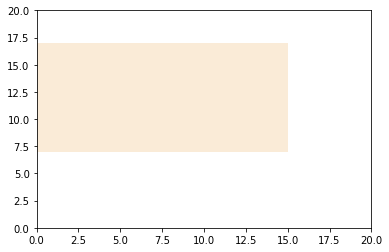

In [48]:
fig,ax = plt.subplots(1)
plt.axis([0, width, 0, height]) 
tower = generate_tower(width, height)
display_patch = graph_patches([tower])
ax.add_patch(display_patch[0])
fig.canvas.draw()
print tower

# Question 1: Resulting Resolved Coverage

The number below will specify how many towers we would like to add to our coverage area.

In [49]:
tower_count = 7

# Algorithm Explanation

The code below populates the coverage area with randomly sampled towers. The way it works is that it adds a tower if the region is empty. Then, when it tries to add another one, it compares the new one to the ones that are already placed. If there is any overlap, it will modify the new tower to be cut in all possible ways such that the new tower does not touch any of the other towers. Then, it looks through all possible cuts and picks the one with the highest area so that it optimally maximizes the coverage. This continues until all towers are added or until the coverage is completely filled, whichever comes first.

In [52]:
original = []
trimmed = []
new_tower = generate_tower(width, height)
original.append(new_tower)
trimmed.append(new_tower)

added_count = 1
while added_count < tower_count:
    area = 0
    for t in trimmed:
        if t != None:
            area = area + t.width*t.height
    if area == height*width:
        break
    new_tower = generate_tower(width, height)
    trim_tower = generate_max_tower(new_tower, trimmed)
    if trim_tower is not None:
        original.append(new_tower)
        trimmed.append(trim_tower)
        added_count = added_count + 1
print (original)
print (trimmed)

[Bottom Left Corner = (8, 1), Width = 6, Height = 17, Bottom Left Corner = (1, 0), Width = 19, Height = 9, Bottom Left Corner = (4, 8), Width = 11, Height = 12, Bottom Left Corner = (5, 2), Width = 13, Height = 3, Bottom Left Corner = (0, 0), Width = 10, Height = 20, Bottom Left Corner = (0, 0), Width = 12, Height = 20, Bottom Left Corner = (7, 6), Width = 12, Height = 3]
[Bottom Left Corner = (8, 1), Width = 6, Height = 17, Bottom Left Corner = (1, 0), Width = 7, Height = 9, Bottom Left Corner = (4, 9), Width = 4, Height = 11, Bottom Left Corner = (14, 2), Width = 4, Height = 3, Bottom Left Corner = (0, 9), Width = 4, Height = 11, Bottom Left Corner = (0, 0), Width = 1, Height = 9, Bottom Left Corner = (14, 6), Width = 5, Height = 3]


Here, we can see each tower being dynamically added to the coverage area and trimmed accordingly such that there is no overlap amongst towers.

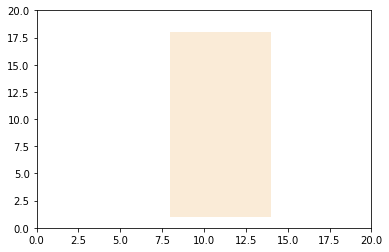

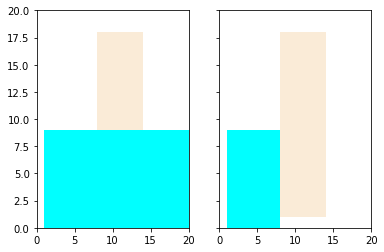

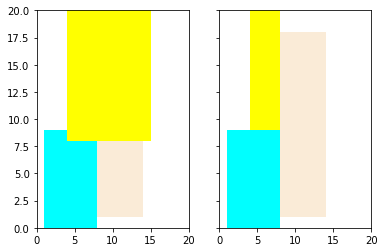

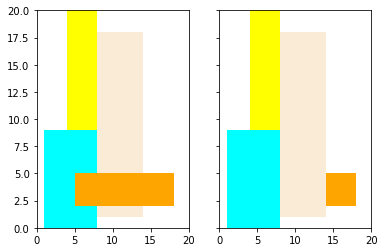

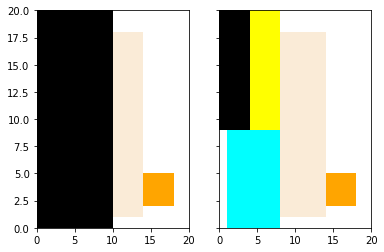

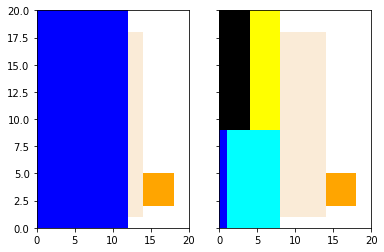

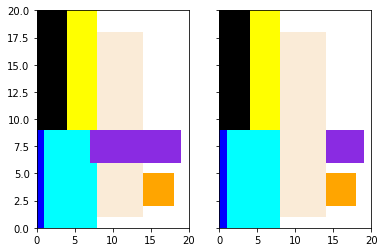

In [53]:
trimmed_rects = graph_patches(trimmed)
original_rects = graph_patches(original)
#plot first rect, which doesn't need to be trimmed
next_rect = original_rects[0]
fig, ax1 = plt.subplots(1)
plt.axis([0, width, 0, height])
ax1.add_patch(next_rect)

#Plot before and after trim (left and right respectively)
for i in range(1, len(trimmed_rects)):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex='all', sharey='all')
    plt.axis([0, width, 0, height])
    
    original_rects = graph_patches(original)
    trimmed_rects = graph_patches(trimmed)
    
    next_rect = original_rects[i]
    for r in trimmed_rects[:i]:
        ax1.add_patch(r)
    ax1.add_patch(next_rect)
    
    original_rects = graph_patches(original)
    trimmed_rects = graph_patches(trimmed)
    
    next_rect = trimmed_rects[i]
    for r in trimmed_rects[:i]:
        ax2.add_patch(r)
    ax2.add_patch(next_rect)

Below is what the area would look like after all towers are added if trimming did not occur.

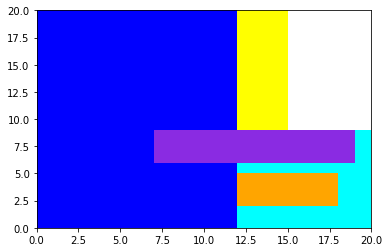

In [54]:
fig, ax1 = plt.subplots(1)
trimmed_rects = graph_patches(trimmed)
original_rects = graph_patches(original)
ax1.set_xlim(0, width)
ax1.set_ylim(0, height)
for i in original_rects:
    ax1.add_patch(i)
plt.show()

Below is what the area looks like after all towers are added and trimming is performed.

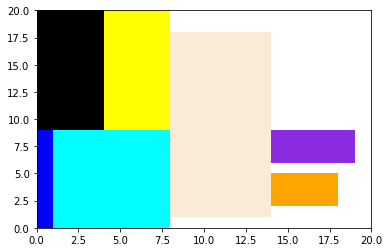

In [55]:
fig, ax1 = plt.subplots(1)
trimmed_rects = graph_patches(trimmed)
original_rects = graph_patches(original)
ax1.set_xlim(0, width)
ax1.set_ylim(0, height)
for i in trimmed_rects:
    ax1.add_patch(i)

# Question 2: Total Area of Coverage / Gaps

The total area of coverage can be seen below. Given a low number of towers, it is likely that there will be gaps. However, rerunning the code after changing the number of towers to a very high number (say, 100) makes it very likely that the entire coverage field will be covered.

In [56]:
area = 0
for t in trimmed:
    if t != None:
        area = area + t.width*t.height
print "%s/%s units have coverage" % (area, width*height)
if area != width*height:
    print "Yes, there are gaps in the coverage"
else:
    print "No, there are not any gaps in the coverage"

289/400 units have coverage
Yes, there are gaps in the coverage


# Question 3: Average Number of Towers for Full Coverage

For neatness, I made a helper function below which will continue populating the area until it is fully covered and will then return the number of towers it took to populate it.

In [57]:
def full_coverage(width, height):
    trimmed = []
    original = []
    added_tower = generate_tower(width, height)
    original.append(added_tower)
    trimmed.append(added_tower)
    added_count = 1
    while True:
        area = 0
        for t in trimmed:
            if t != None:
                area = area + t.width*t.height
        if area == height*width:
            break
        added_tower = generate_tower(width, height)
        max_tower = generate_max_tower(added_tower, trimmed)
        if max_tower is not None:
            original.append(added_tower)
            trimmed.append(max_tower)
            added_count = added_count + 1
    return added_count

run_count simply determines how many times we will fully populate. The higher the number, the more accurate our average will be, but the tradeoff is that it will take longer to run.

In [58]:
run_count = 100

In [59]:
sum = 0
for i in range(0, run_count):
    num_towers = full_coverage(width,height)
    sum = sum + num_towers
print "Average number of towers to full coverage is: %s" % (float(sum)/run_count)

Average number of towers to full coverage is: 24.94


# Rerun with Many Towers

As mentioned previously, running the code with many towers (say, 100) will almost certainly lead to full coverage. This can be seen below.

In [60]:
tower_count = 100
original = []
trimmed = []
new_tower = generate_tower(width, height)
original.append(new_tower)
trimmed.append(new_tower)

added_count = 1
while added_count < tower_count:
    area = 0
    for t in trimmed:
        if t != None:
            area = area + t.width*t.height
    if area == height*width:
        break
    new_tower = generate_tower(width, height)
    trim_tower = generate_max_tower(new_tower, trimmed)
    if trim_tower is not None:
        original.append(new_tower)
        trimmed.append(trim_tower)
        added_count = added_count + 1

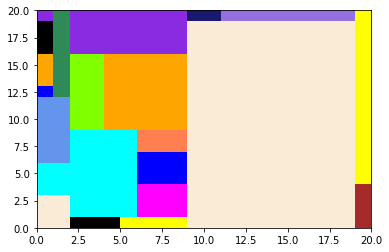

In [61]:
fig, ax1 = plt.subplots(1)
trimmed_rects = graph_patches(trimmed)
original_rects = graph_patches(original)
ax1.set_xlim(0, width)
ax1.set_ylim(0, height)
for i in trimmed_rects:
    ax1.add_patch(i)

In [62]:
area = 0
for t in trimmed:
    if t != None:
        area = area + t.width*t.height
print "%s/%s units have coverage" % (area, width*height)
if area != width*height:
    print "Yes, there are gaps in the coverage"
else:
    print "No, there are not any gaps in the coverage"

400/400 units have coverage
No, there are not any gaps in the coverage


# Conclusion

Using this program, we can see that there are many different ways to create cell coverage for an area. I chose to use a greedy algorithm because it is intuitive and maximizes the area. Adding more towers makes it more likely that the area will be fully covered.

An issue with this system's design though is that the towers are uniformly distributed, so we cannot always create an optimal setup for coverage. If we were able to choose the size of the tower as well as where it is placed, it would be much easier to create the coverage we want. 

This project illustrates how it is possible to solve a problem using not only algorithm and system design, but also visualizations that help us understand exactly how the system works and progresses over time.